<a href="https://colab.research.google.com/github/cyber-slinger/income_usa/blob/main/income_usa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded =files.upload()

Saving income.csv to income (1).csv


# Loading Datasets

In [ ]:
import pandas as pd
dataset = pd.read_csv('income.csv')

# Visualizing data and length of dataset

In [ ]:
print("total rows:",len(dataset))
dataset.head()


total rows: 26215


,income,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week
0,0,39,State-gov,Bachelors,NotMarried,Adm-clerical,Not-in-family,White,Male,40
1,0,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,13
2,0,38,Private,HS-grad,Separated,Handlers-cleaners,Not-in-family,White,Male,40
3,0,53,Private,11th,Married,Handlers-cleaners,Husband,Black,Male,40
4,0,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,40


# ** Preprocess the Dataset**


# 1) Dealing with the missing values


In [ ]:
#check if there is any missing values or not in the dataset
dataset.isna().sum()

,0
income,0
age,0
workclass,1396
education,0
marital-status,0
occupation,1401
relationship,0
race,0
sex,0
hours-per-week,0


**a. Drop the rows which has the missing values, No. of Dropped rows, Check missing values again**


In [ ]:
#Since we have very small number of missing values in our dataset, we can remove it for easy processing
cleaned_dataset0=dataset.dropna()
print("cleaned_dataset0:",len(cleaned_dataset0)) #No. of rows after removing missing values
print("Dropped rows:",len(dataset)-len(cleaned_dataset0)) #No. of Dropped rows
cleaned_dataset0.isnull().any()#check if there is any missing values or not in the new dataset

cleaned_dataset0: 24814
Dropped rows: 1401


,0
income,False
age,False
workclass,False
education,False
marital-status,False
occupation,False
relationship,False
race,False
sex,False
hours-per-week,False


# 2) Dealing with Duplicated Data

**a. Check if there is any duplicated rows in the dataset and drop it**

In [ ]:
# check if these is any duplicated rows
cleaned_dataset0.duplicated().sum()


3277

**b. Removing duplicated rows**

In [ ]:
# remove duplicate
cleaned_dataset1=cleaned_dataset0.drop_duplicates()
print("cleaned_dataset1:",len(cleaned_dataset1))
cleaned_dataset1.duplicated().sum() # check again if these is any duplicated rows now

cleaned_dataset1: 21537


0

# 3) Describe the numerical feature of the dataset


In [ ]:
cleaned_dataset1.describe()

,income,age,hours-per-week
count,21537.000000,21537.000000,21537.000000
mean,0.298881,39.407624,41.478015
std,0.457778,13.203134,12.501092
min,0.000000,17.000000,1.000000
25%,0.000000,29.000000,40.000000
50%,0.000000,38.000000,40.000000
75%,1.000000,48.000000,47.000000
max,1.000000,90.000000,99.000000


# 4) Handling categorical variables (which are except age and hours-per-week in this case)

**a. For Binary Variable 'sex'**

In [ ]:
#Copying the dataframe to a new variable
cleaned_dataset2 = cleaned_dataset1.copy()
#Map 'sex' column:'Male' -> 1 and 'Female' -> 0 and make a new column of gender
cleaned_dataset2.loc[:,'gender']=cleaned_dataset2['sex'].map({'Male':1,'Female':0})
cleaned_dataset2.head()

,income,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,gender
0,0,39,State-gov,Bachelors,NotMarried,Adm-clerical,Not-in-family,White,Male,40,1
1,0,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,13,1
2,0,38,Private,HS-grad,Separated,Handlers-cleaners,Not-in-family,White,Male,40,1
3,0,53,Private,11th,Married,Handlers-cleaners,Husband,Black,Male,40,1
4,0,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,40,0


**b. Drop the original 'sex' column**

In [ ]:
cleaned_dataset2.drop(columns=['sex'], inplace=True)
cleaned_dataset2.head()

,income,age,workclass,education,marital-status,occupation,relationship,race,hours-per-week,gender
0,0,39,State-gov,Bachelors,NotMarried,Adm-clerical,Not-in-family,White,40,1
1,0,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,13,1
2,0,38,Private,HS-grad,Separated,Handlers-cleaners,Not-in-family,White,40,1
3,0,53,Private,11th,Married,Handlers-cleaners,Husband,Black,40,1
4,0,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,40,0


**c. Check value count for the categorical variables**

In [ ]:
print(cleaned_dataset2['workclass'].value_counts())
print(cleaned_dataset2['education'].value_counts())
print(cleaned_dataset2['marital-status'].value_counts())
print(cleaned_dataset2['occupation'].value_counts())
print(cleaned_dataset2['relationship'].value_counts())
print(cleaned_dataset2['race'].value_counts())

workclass
Private             15108
Self-emp-not-inc     1999
Local-gov            1656
State-gov            1021
Self-emp-inc          951
Federal-gov           793
Without-pay             9
Name: count, dtype: int64
education
HS-grad         6442
Some-college    4668
Bachelors       3701
Masters         1324
Assoc-voc       1007
Assoc-acdm       814
11th             718
10th             592
Prof-school      487
7th-8th          427
Doctorate        356
9th              355
12th             296
5th-6th          212
1st-4th          104
Preschool         34
Name: count, dtype: int64
marital-status
Married       10291
NotMarried     6752
Separated      3848
Widowed         646
Name: count, dtype: int64
occupation
Prof-specialty       3212
Exec-managerial      3017
Sales                2597
Adm-clerical         2589
Craft-repair         2489
Other-service        2244
Machine-op-inspct    1302
Transport-moving     1136
Handlers-cleaners     862
Farming-fishing       752
Tech-support      

**d. Deal with ordinal variables, transform the string into numbers making a dictionary as education_order**


In [ ]:
cleaned_dataset3=cleaned_dataset2.copy()

#Ordinal encoding
education_order = {'Preschool':1, '1st-4th':2, '5th-6th':3, '7th-8th':4, '9th':5, '10th':6, '11th':7, '12th':8,
                   'HS-grad':9, 'Some-college':10, 'Assoc-voc':11, 'Assoc-acdm':12, 'Prof-school':13,
                   'Bachelors':14, 'Masters':15, 'Doctorate':16}
cleaned_dataset3['education'] = cleaned_dataset3['education'].replace(education_order)
cleaned_dataset3.head()


,income,age,workclass,education,marital-status,occupation,relationship,race,hours-per-week,gender
0,0,39,State-gov,14,NotMarried,Adm-clerical,Not-in-family,White,40,1
1,0,50,Self-emp-not-inc,14,Married,Exec-managerial,Husband,White,13,1
2,0,38,Private,9,Separated,Handlers-cleaners,Not-in-family,White,40,1
3,0,53,Private,7,Married,Handlers-cleaners,Husband,Black,40,1
4,0,28,Private,14,Married,Prof-specialty,Wife,Black,40,0


# To download the cleaned_dataset3, first make dataframe to csv and download

In [ ]:
#To download the cleaned_dataset3, first make dataframe to csv and download
df=pd.DataFrame(cleaned_dataset3)
df.to_csv('cleaned_dataset3.csv', index=False)

from google.colab import files
files.download('cleaned_dataset3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**e. Deal with nominal varibles (transform nominal variables into dummy variables)**

In [ ]:
cleaned_dataset4= pd.get_dummies(cleaned_dataset3, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race'], dtype=int)
cleaned_dataset4.head()


,income,age,education,hours-per-week,gender,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,39,14,40,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,50,14,13,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,38,9,40,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,53,7,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,28,14,40,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


# 5) Check Data Shape

In [ ]:
cleaned_dataset4.shape

(21537, 41)

# 6) To apply correlation analysis on my dataframe(optional)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = cleaned_dataset4.corr()

# Display the correlation matrix
print(correlation_matrix)

                                income       age  education  hours-per-week  \
income                        1.000000  0.234617   0.333525        0.237795   
age                           0.234617  1.000000   0.045816        0.070756   
education                     0.333525  0.045816   1.000000        0.138540   
hours-per-week                0.237795  0.070756   0.138540        1.000000   
gender                        0.221008  0.073147   0.014100        0.233383   
workclass_Federal-gov         0.059240  0.051313   0.059811        0.005758   
workclass_Local-gov           0.030859  0.062543   0.108917       -0.003870   
workclass_Private            -0.135985 -0.202156  -0.167895       -0.092807   
workclass_Self-emp-inc        0.147505  0.116666   0.071747        0.127251   
workclass_Self-emp-not-inc    0.031997  0.138250  -0.002143        0.084423   
workclass_State-gov           0.016630  0.010191   0.106220       -0.037422   
workclass_Without-pay        -0.013350 -0.003384  -0

# 7) Further visualize this correlation matrix using a heatmap

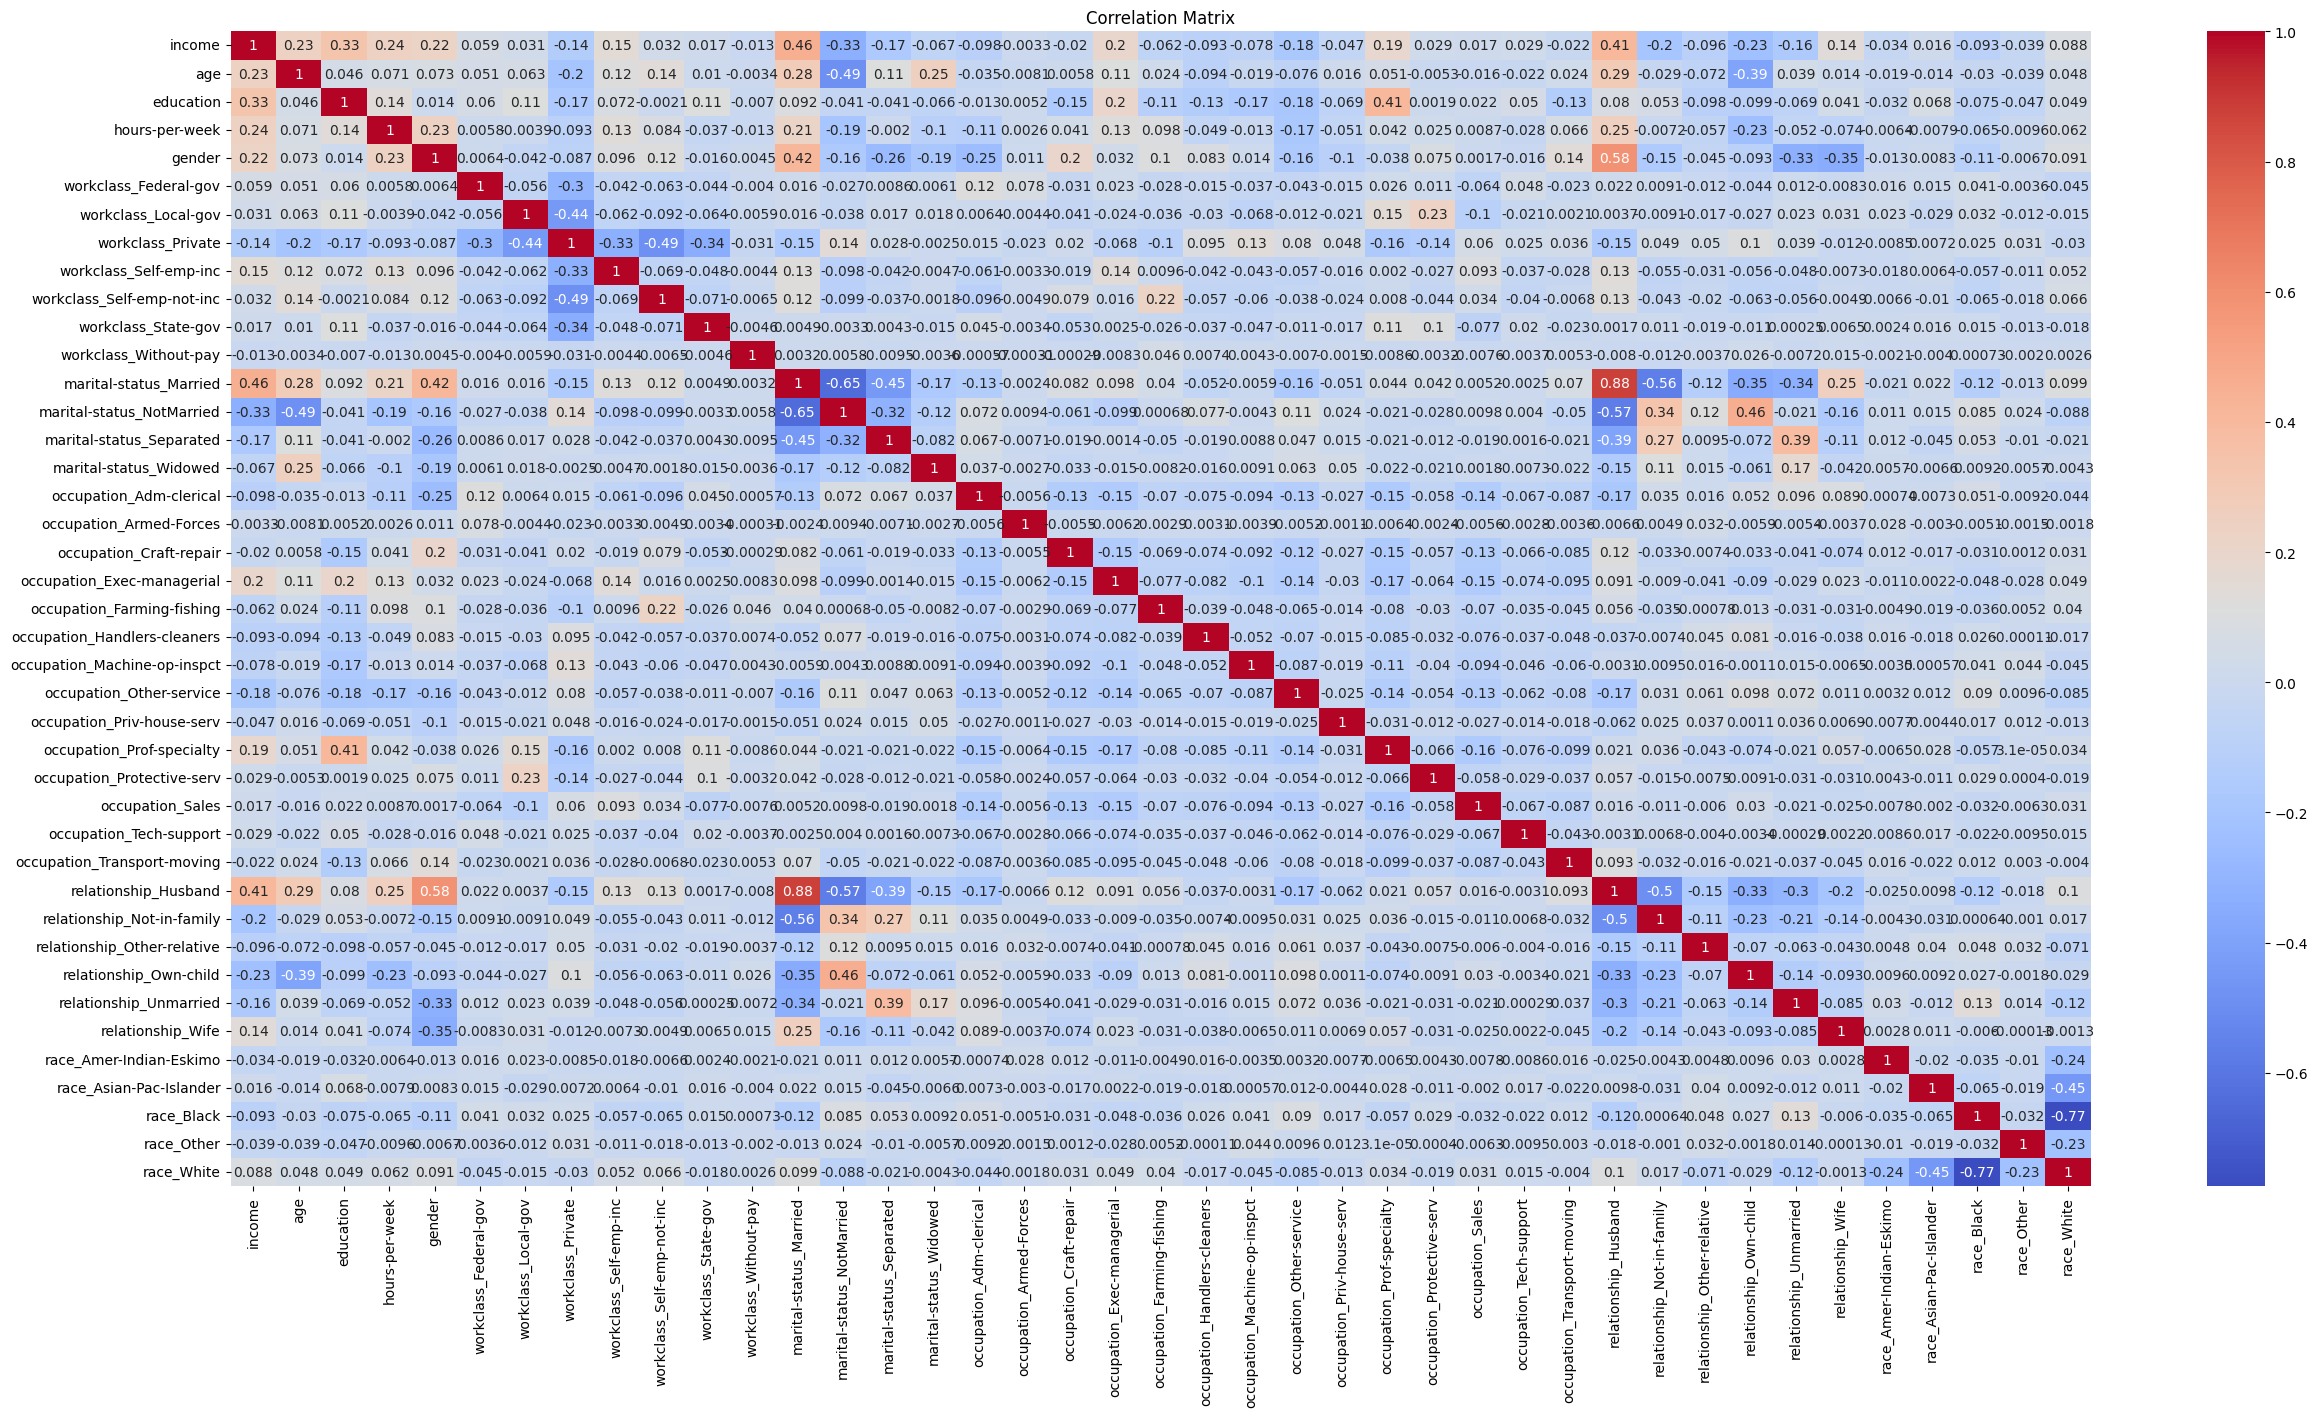

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(30, 15))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix = cleaned_dataset4.corr()

# Find pairs of features with correlation of +0.5 or -0.5
redundant_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.5:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            redundant_features.append((feature1, feature2, correlation_matrix.iloc[i, j]))

# Print the redundant features
print("Redundant features with correlation of +0.5 or -0.5:")
for feature1, feature2, corr in redundant_features:
    print(f"{feature1} and {feature2} with correlation {corr:.2f}")

Redundant features with correlation of +0.5 or -0.5:
marital-status_NotMarried and marital-status_Married with correlation -0.65
relationship_Husband and gender with correlation 0.58
relationship_Husband and marital-status_Married with correlation 0.88
relationship_Husband and marital-status_NotMarried with correlation -0.57
relationship_Not-in-family and marital-status_Married with correlation -0.56
race_White and race_Black with correlation -0.77


# 8) Droping the relationship_Husband and relationship_Not-in-family


In [ ]:
cleaned_dataset5=cleaned_dataset4.drop(columns=['relationship_Husband', 'relationship_Not-in-family'])
cleaned_dataset5.head()

,income,age,education,hours-per-week,gender,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Transport-moving,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,39,14,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,50,14,13,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,38,9,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,53,7,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,28,14,40,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


# 9) Check Dataset shape again

In [ ]:
cleaned_dataset5.shape

(21537, 39)

# Download the Dataset

In [ ]:
#To download the cleaned_dataset3, first make dataframe to csv and download
df=pd.DataFrame(cleaned_dataset5)
df.to_csv('cleaned_dataset5.csv', index=False)

from google.colab import files
files.download('cleaned_dataset5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 10) Define the input variables and target variable

In [ ]:
array= cleaned_dataset5.values
X=array[:,1:39]
y=array[:,0]

# 11) Split the Dataset (with 10% for testing)
Randomly sample the dataset with a random state of 22114129, use 90% for trainning and 10% for testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y,test_size=0.1, random_state=22114129)

# 12) Normalize the data
Apply normalization on both train and testing dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#fit scaler on training data
norm = MinMaxScaler().fit(X_train)

#transform training data
X_train_norm= norm.fit_transform(X_train)

#transform testing data
X_test_norm =norm.fit_transform(X_test)

#Display the normalized Dataset
print("Normalized X_train:\n",X_train_norm)
print("Normalized X_test:\n",X_test_norm)

Normalized X_train:
 [[0.23287671 0.53333333 0.39795918 ... 0.         0.         1.        ]
 [0.31506849 0.6        0.5        ... 0.         0.         1.        ]
 [0.46575342 0.86666667 0.5        ... 0.         0.         1.        ]
 ...
 [0.1369863  0.53333333 0.60204082 ... 1.         0.         0.        ]
 [0.28767123 0.66666667 0.39795918 ... 0.         0.         1.        ]
 [0.15068493 0.53333333 0.39795918 ... 0.         0.         1.        ]]
Normalized X_test:
 [[0.39726027 1.         0.55102041 ... 0.         0.         1.        ]
 [0.34246575 0.53333333 0.39795918 ... 0.         0.         1.        ]
 [0.35616438 0.86666667 0.60204082 ... 0.         0.         1.        ]
 ...
 [0.32876712 0.53333333 0.5        ... 0.         0.         1.        ]
 [0.17808219 0.53333333 0.60204082 ... 0.         0.         1.        ]
 [0.46575342 0.4        0.39795918 ... 0.         0.         1.        ]]


# 13) Train a model

# LogReg and SVM (Training Dataset)

Example of how to build a Linear Regression Model(LR)

a. Define two  regression models; Logistic Regression and SVM with their default  settings


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#Define the two regression models
#logistic regression model, parameters can be changed, in this case we are using solver
logregmodel = LogisticRegression(solver="liblinear")
logregmodel.fit(X_train_norm, y_train)
test_score=logregmodel.score(X_test_norm, y_test)
print("Test Score of LogReg:",test_score)

#SVM for classification, parameters can be changed
SVCmodel=SVC()
SVCmodel.fit(X_train_norm, y_train)
test_score2=SVCmodel.score(X_test_norm, y_test)
print("Test Score of SVM:",test_score2)

Test Score of LogReg: 0.8012999071494893
Test Score of SVM: 0.7896935933147632


# Cross Validation on testing dataset

b. Define 10-fold cross-validation

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=22114129) #n_splits=10 for 10 cv

c.Run the 10-fold cross validation and print the average accuracy score based on the cross validation results, and evaluate both model on the testing dataset

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Logistic Regression with CV
results = cross_val_score(logregmodel, X_test_norm, y_test, cv=kfold)
print("CV_Score of LogReg:\n",results)
print("Average Accuracy CV_Score of LogReg:\n",results.mean())

results2 = cross_val_score(SVCmodel, X_test_norm, y_test, cv=kfold)
print("\nCV_Score of SVM:\n",results2)
print("Average Accuracy CV_Score of SVM:\n",results2.mean())

CV_Score of LogReg:
 [0.77314815 0.82407407 0.8287037  0.81944444 0.81395349 0.78139535
 0.75813953 0.79534884 0.77674419 0.79534884]
Average Accuracy CV_Score of LogReg:
 0.7966300602928509

CV_Score of SVM:
 [0.78703704 0.80555556 0.80555556 0.78240741 0.82325581 0.75348837
 0.73953488 0.78139535 0.79534884 0.78604651]
Average Accuracy CV_Score of SVM:
 0.7859625322997416



#Fine Tuning
# Optimize the Logistic Regression models with cross validation

c. Apply parameter finetuning/ Optimization

In [ ]:
# fine tune parameters for logistic regression model

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

grid_params_logreg={
    'penalty':['l1','l2'],
    'C':[1,10],
    'solver':['saga','liblinear']
}

logreg = LogisticRegression(max_iter = 500)
gs_logreg_result = GridSearchCV(estimator=logreg, param_grid=grid_params_logreg, cv=kfold).fit(X_train_norm, y_train)
print(gs_logreg_result.best_score_)




0.8064281270174799


# Evaluate the trained Logistic Regression model using testing dataset

In [ ]:
test_accuracy = gs_logreg_result.best_estimator_.score(X_test_norm, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8012999071494893


Check the parameters setting for the best selected model

In [ ]:
gs_logreg_result.best_params_


{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

# Optimizing the SVM models with above steps

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=22114129) #n_splits=10 for 10 cv

grid_params_svc ={
    'kernel':['linear', 'poly'],
    'C':[1, 10],
    'degree':[3],  # Fix the degree to reduce combinations
    'gamma':['auto']  # Fix the gamma to reduce combinations
}

svc = SVC()
gs_svc_result = GridSearchCV(estimator=svc, param_grid=grid_params_svc, cv=kfold).fit(X_train_norm, y_train)
print(gs_svc_result.best_score_)



0.7951293423441624


# Evaluate the trained SVM model using testing dataset

In [ ]:
test_accuracy = gs_svc_result.best_estimator_.score(X_test_norm, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.78644382544104


Check the parameter setting for the best selected model

In [ ]:
gs_svc_result.best_params_

{'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}